In [2]:
from pathlib import Path
import zipfile
import h5py
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
import sklearn      

def MagModel(n_channel, coordinates, roll=-14):
    ant_angles = np.arange(0, 360, 360//n_channel)

    x_array = 0.1 * np.cos(np.radians(ant_angles))
    y_array = 0.1 * np.sin(np.radians(ant_angles))
    x_coord, y_coord = coordinates[:, 0], coordinates[:, 1]
    
    d0 = 0.1

    d = np.sqrt(
        (x_array[:, np.newaxis] - x_coord[np.newaxis, :]) ** 2
        + (y_array[:, np.newaxis] - y_coord[np.newaxis, :]) ** 2
        )
    
    relative_mag = d0/d
    
    return relative_mag




# develop phase corrections for phase difference distributions

In [3]:
jugaad_data = Path.home()/'iCloud'/'jugaad_data'/'Characterization'/'data.h5'
jugaad_data = h5py.File(jugaad_data, 'r')


In [4]:
test_key = 'r00z00'

test_data = jugaad_data[test_key][:]
print(test_data.shape)

(60, 141, 2, 2)


# visualize select magnitudes

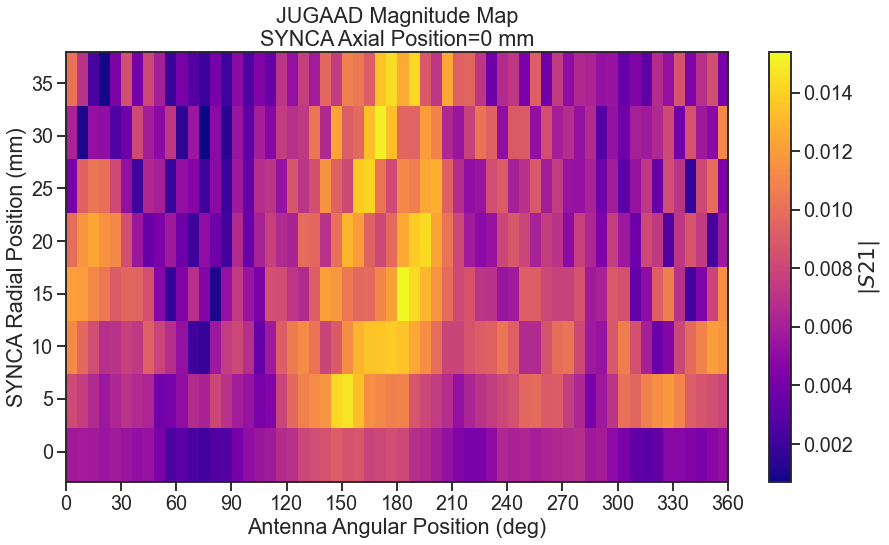

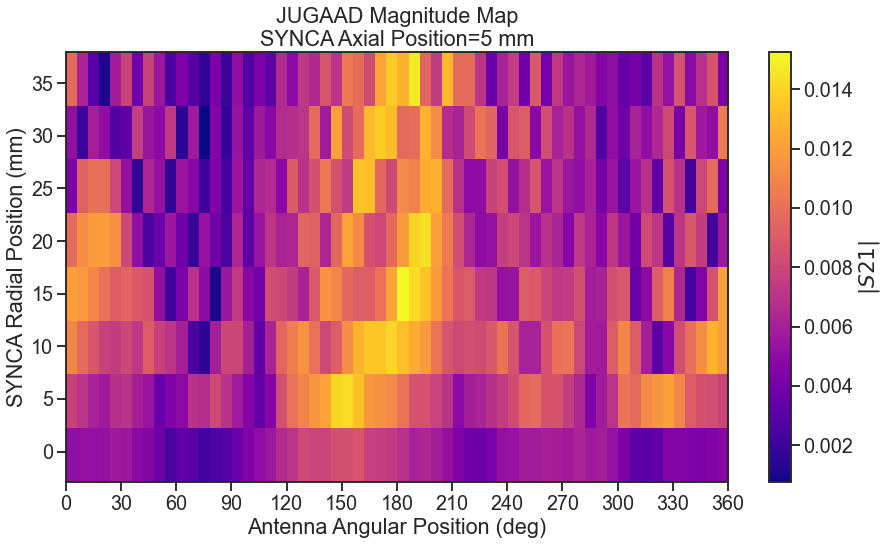

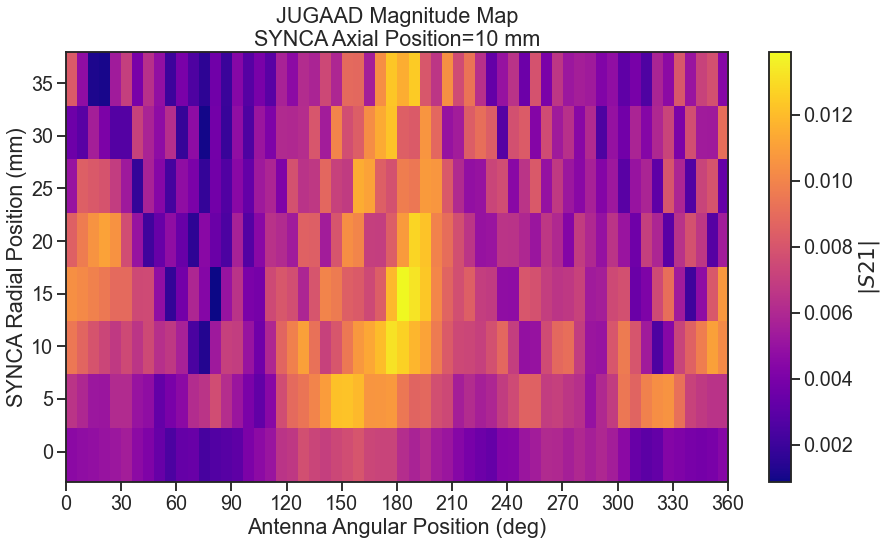

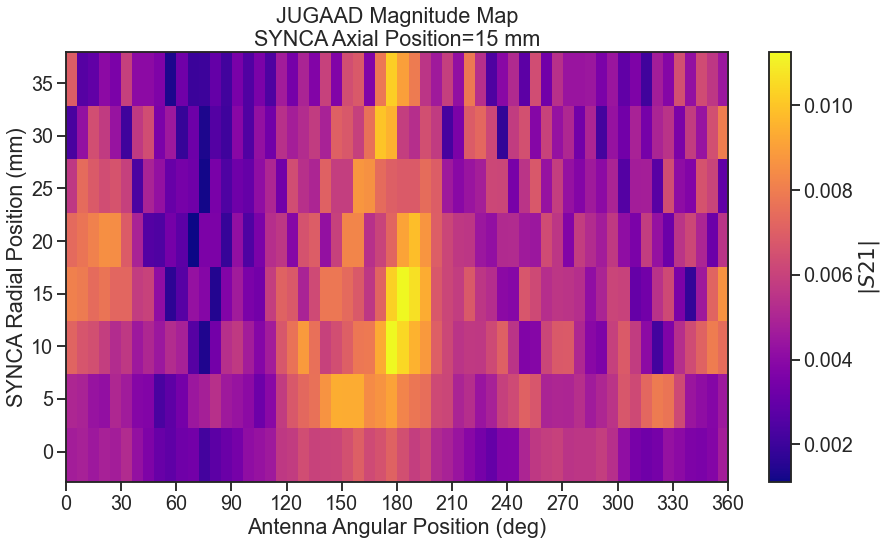

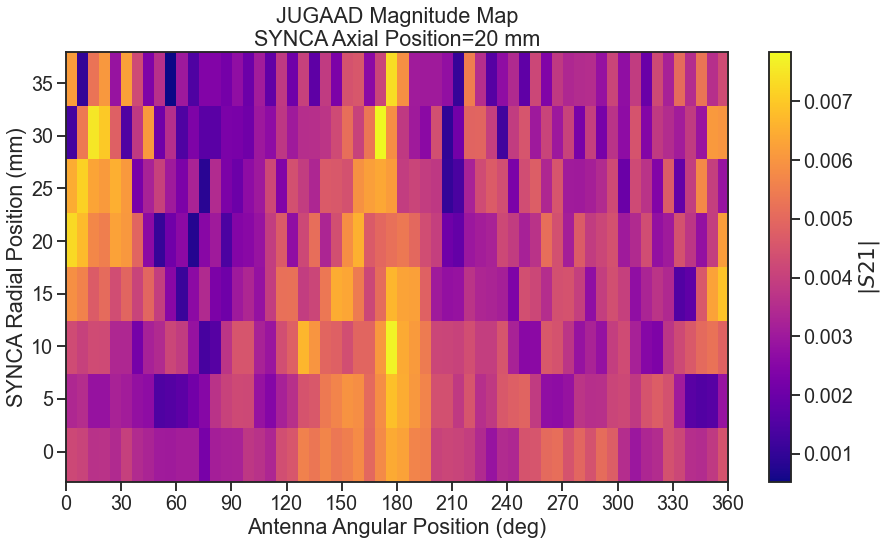

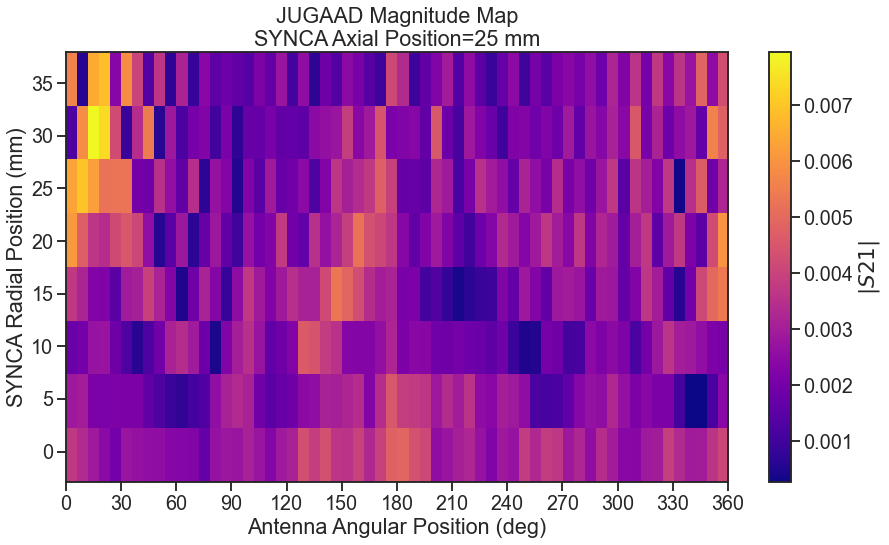

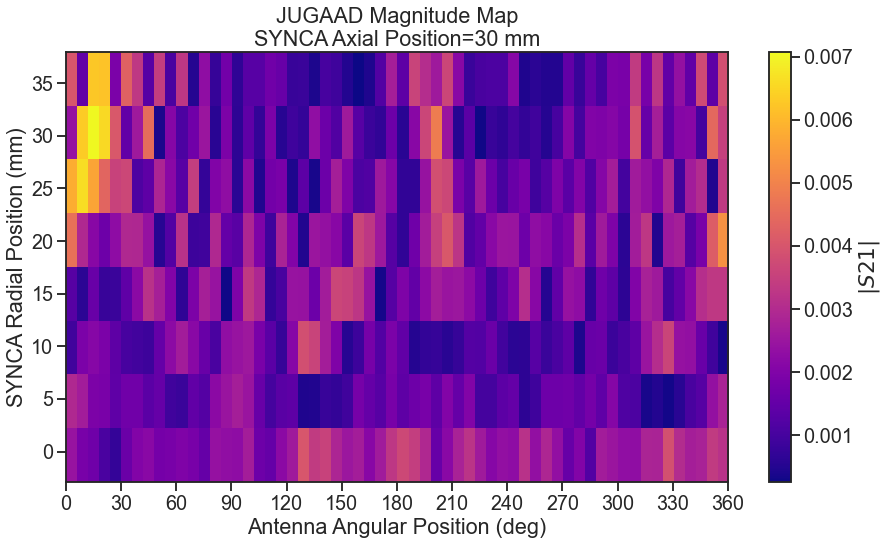

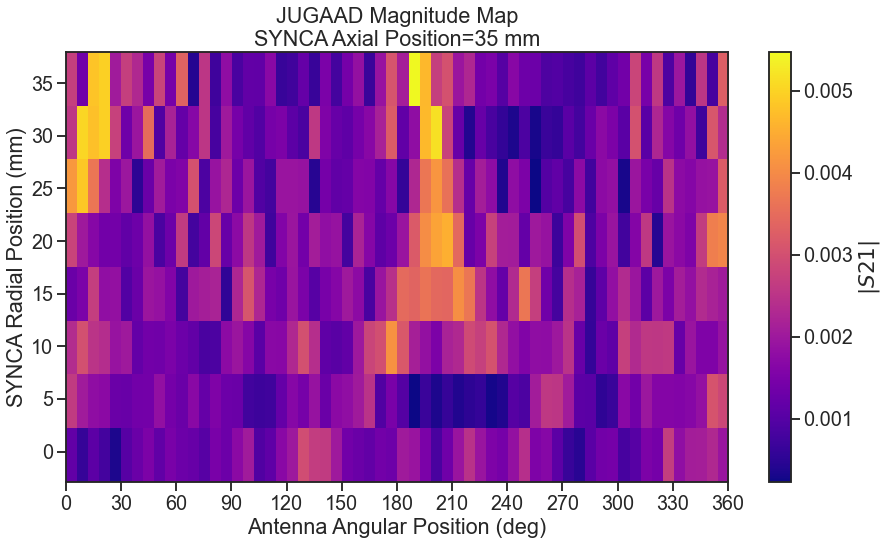

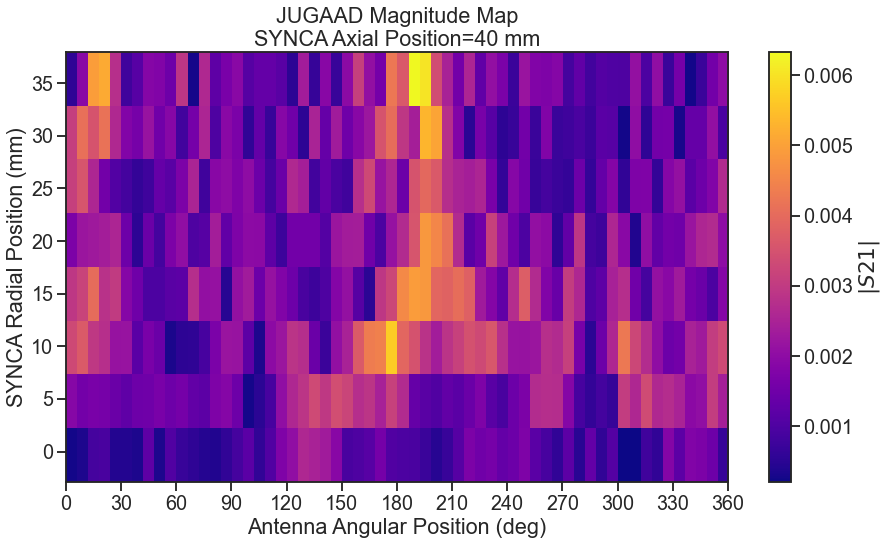

In [14]:
#fig,axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(40,16))
sns.set_theme(context='talk', style='ticks', font_scale=1.2)

clist = sns.color_palette('deep')
cmap = sns.color_palette('plasma', as_cmap=True)
start_f = 75
f_range = 10

axii = [0,5,10,15,20,25,30,35,40]

for m,test_z in enumerate(['00','05','10', '15', '20', '25', '30', '35', '40']):
    
    fig = plt.figure(figsize=(13,8))
    ax = fig.add_subplot(1,1,1)
    combined_mags = np.zeros((8,60))
    for n,r in enumerate(np.arange(0,40,5)):
        if r < 10:
            key = f'r0{r}z{test_z}'
        else:
            key = f'r{r}z{test_z}'
        temp_data = jugaad_data[key][:]
        mags = abs(temp_data[:,start_f:start_f+f_range,0,1]).mean(axis=1)
        #mags = abs(temp_data[:,75,1,0])
        #combined_mags[n,:] = np.convolve(np.roll(mags, 16), np.ones(3)/3,mode='same')
        combined_mags[n,:] = np.convolve(np.roll(mags, -14), np.ones(1)/1,mode='same')
        
    img = ax.imshow(
        np.flip(combined_mags, 0),
        aspect='auto',
        cmap=cmap,
        extent = (0,360,0,35)
    )
    #cbar = fig.colorbar(img)
    
    ax.set_yticks(np.linspace(2.5,32.5,8))
    ax.set_yticklabels(np.arange(0,40,5))
    ax.set_xticks(np.linspace(0, 360, 13))
    cbar = fig.colorbar(img, label=r'$|S21|$')
    ax.set_ylabel('SYNCA Radial Position (mm)')
    ax.set_xlabel('Antenna Angular Position (deg)')
    ax.set_title('JUGAAD Magnitude Map'+'\n'+f'SYNCA Axial Position={axii[m]} mm')
    plt.tight_layout(pad=1.05)
    name = f'230123_jugaad_magnitude_map_z{axii[m]}'
    
    #plt.savefig(Path.home()/'iCloud'/'plots'/name)
    
    
        
    
        
    #plt.tight_layout(pad=1.05)

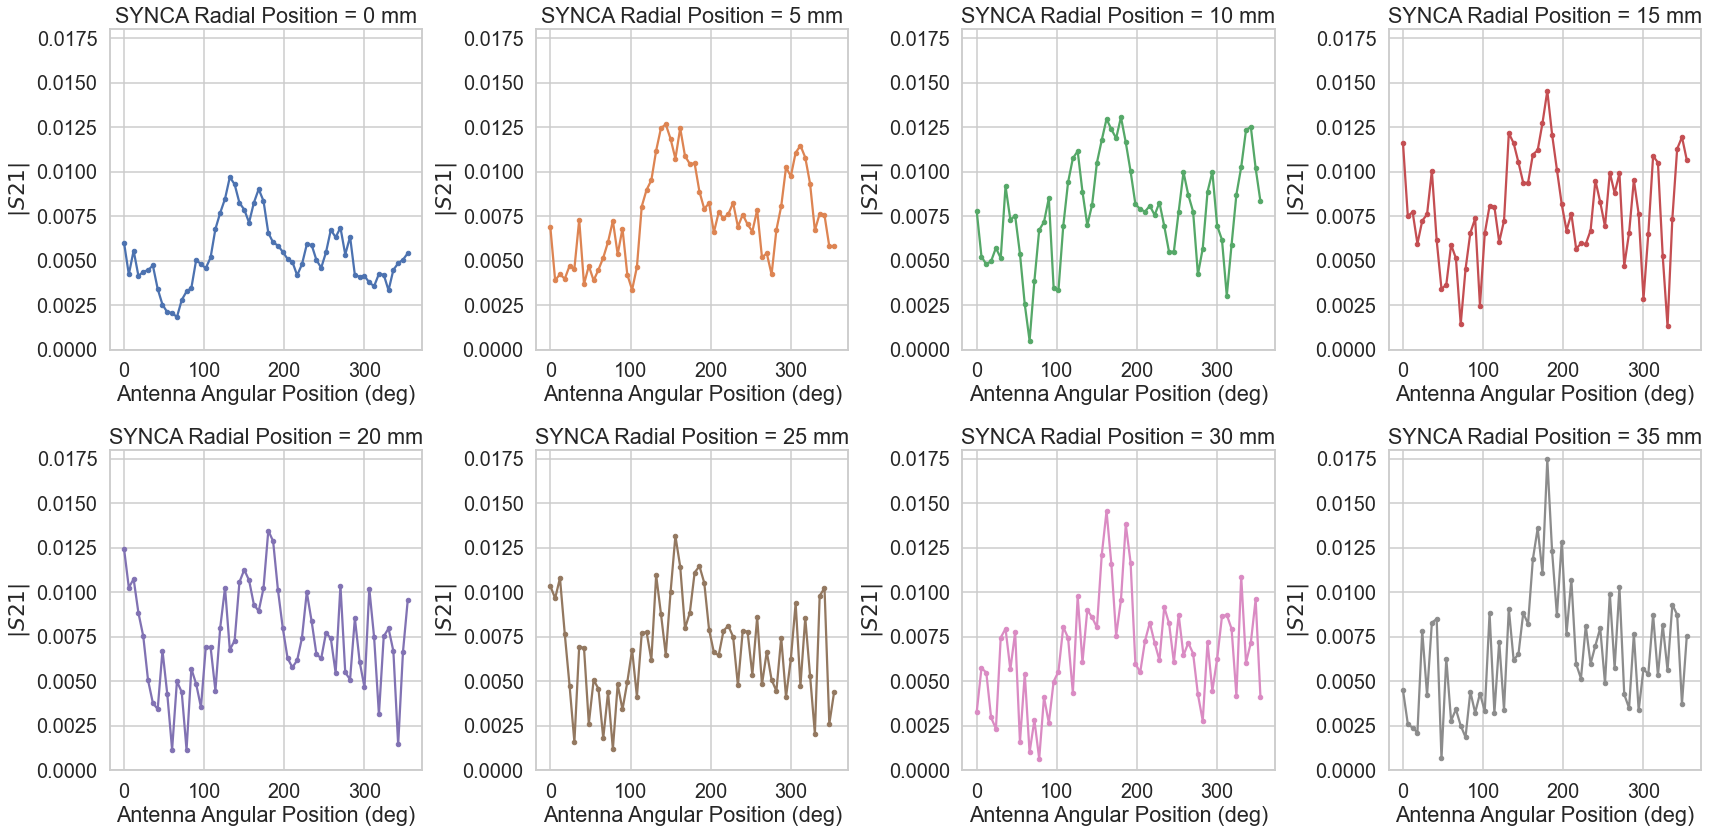

In [181]:
#fig,axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(40,16))
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig,axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(24,12))
axs = axs.flatten()
#fig = plt.figure(figsize=(13,8))
#ax = fig.add_subplot(1,1,1)
clist = sns.color_palette('deep')

for m,test_z in enumerate(['00',]):
    
    for n,r in enumerate(np.arange(0,40,5)):
        if r < 10:
            key = f'r0{r}z{test_z}'
        else:
            key = f'r{r}z{test_z}'
        temp_data = jugaad_data[key][:]
        mags = np.roll(abs(temp_data[:,70,0,1]),-15)
        #mags = mags / np.mean(mags) # rescale
        #mags = mags - np.mean(mags) # remove DC

        axs[n].plot(np.arange(0,360,6),mags, color=clist[n], marker='.',ls='-')
        axs[n].set_ylim(0.0, 0.018)
        axs[n].set_xlabel('Antenna Angular Position (deg)')
        axs[n].set_ylabel(r'$|S21|$')
        axs[n].set_title(f'SYNCA Radial Position = {r} mm')
        
plt.tight_layout(pad=1.05)
name = '230121_jugaad_mag_curves_z10'
#plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)





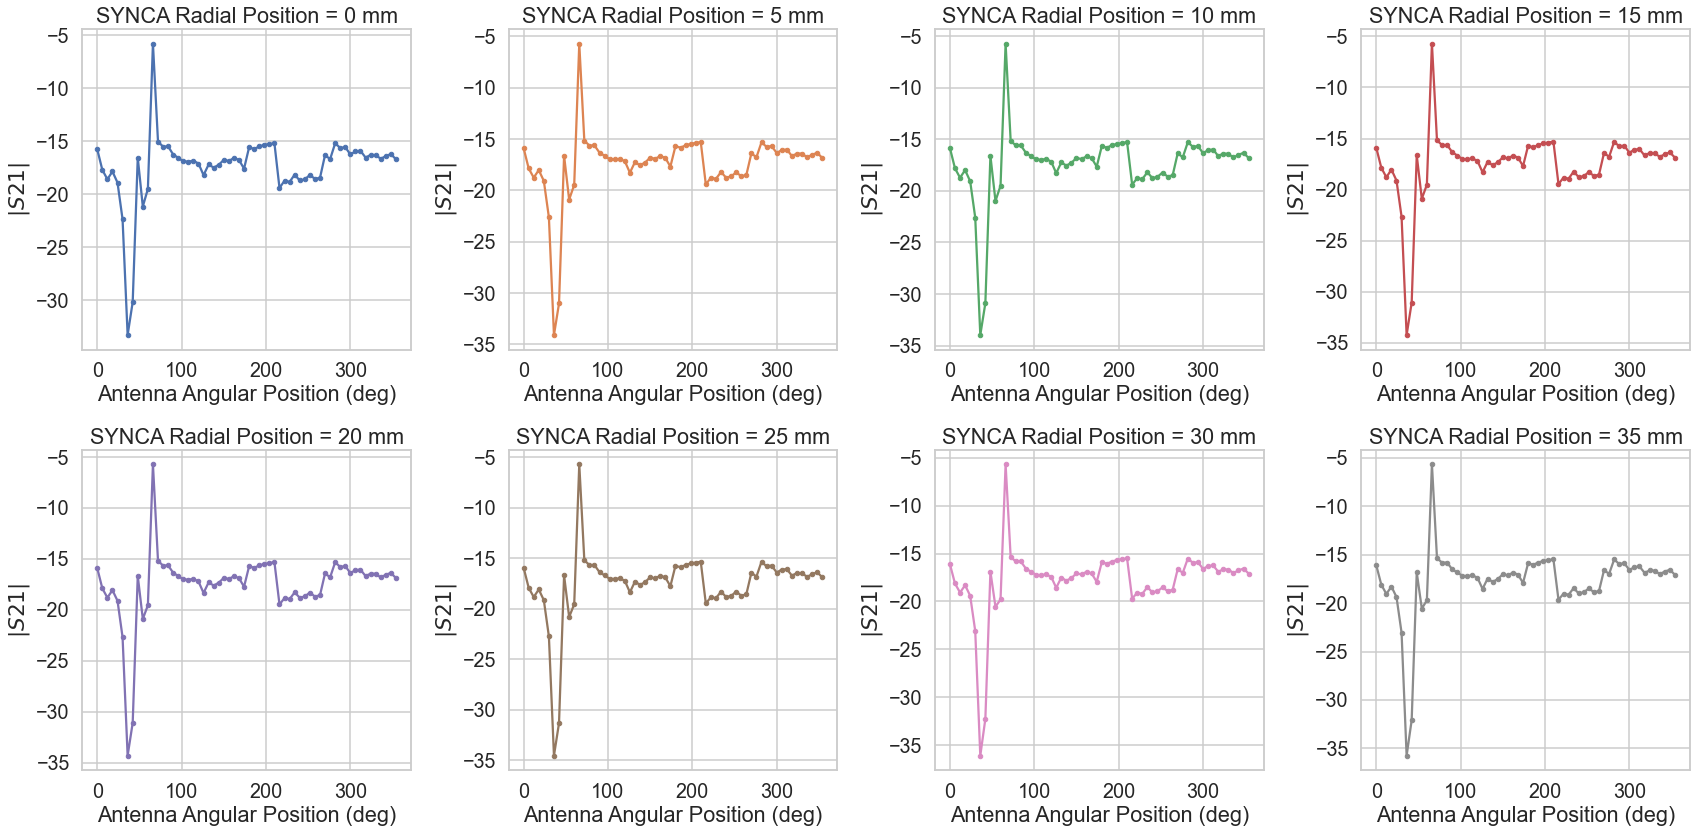

In [188]:
#fig,axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(40,16))
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig,axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(24,12))
axs = axs.flatten()
#fig = plt.figure(figsize=(13,8))
#ax = fig.add_subplot(1,1,1)
clist = sns.color_palette('deep')

for m,test_z in enumerate(['00']):
    
    for n,r in enumerate(np.arange(0,40,5)):
        if r < 10:
            key = f'r0{r}z{test_z}'
        else:
            key = f'r{r}z{test_z}'
        temp_data = jugaad_data[key][:]
        mags = np.roll(20*np.log10(abs(temp_data[:,75,0,0])),-15)
        #mags = np.roll(abs(temp_data[:,0,0,0]),-15)
        phases = np.angle(temp_data[:,20,1,1],)
        #mags = mags / np.mean(mags) # rescale
        #mags = mags - np.mean(mags) # remove DC

        axs[n].plot(np.arange(0,360,6),mags, color=clist[n], marker='.',ls='-')
        #axs[n].plot(np.arange(0,360,6),phases, color=clist[n], marker='.',ls='None')
        #axs[n].set_ylim(-30, 5)
        axs[n].set_xlabel('Antenna Angular Position (deg)')
        axs[n].set_ylabel(r'$|S21|$')
        axs[n].set_title(f'SYNCA Radial Position = {r} mm')
        
plt.tight_layout(pad=1.05)
name = '230121_jugaad_mag_curves_z10'
#plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)




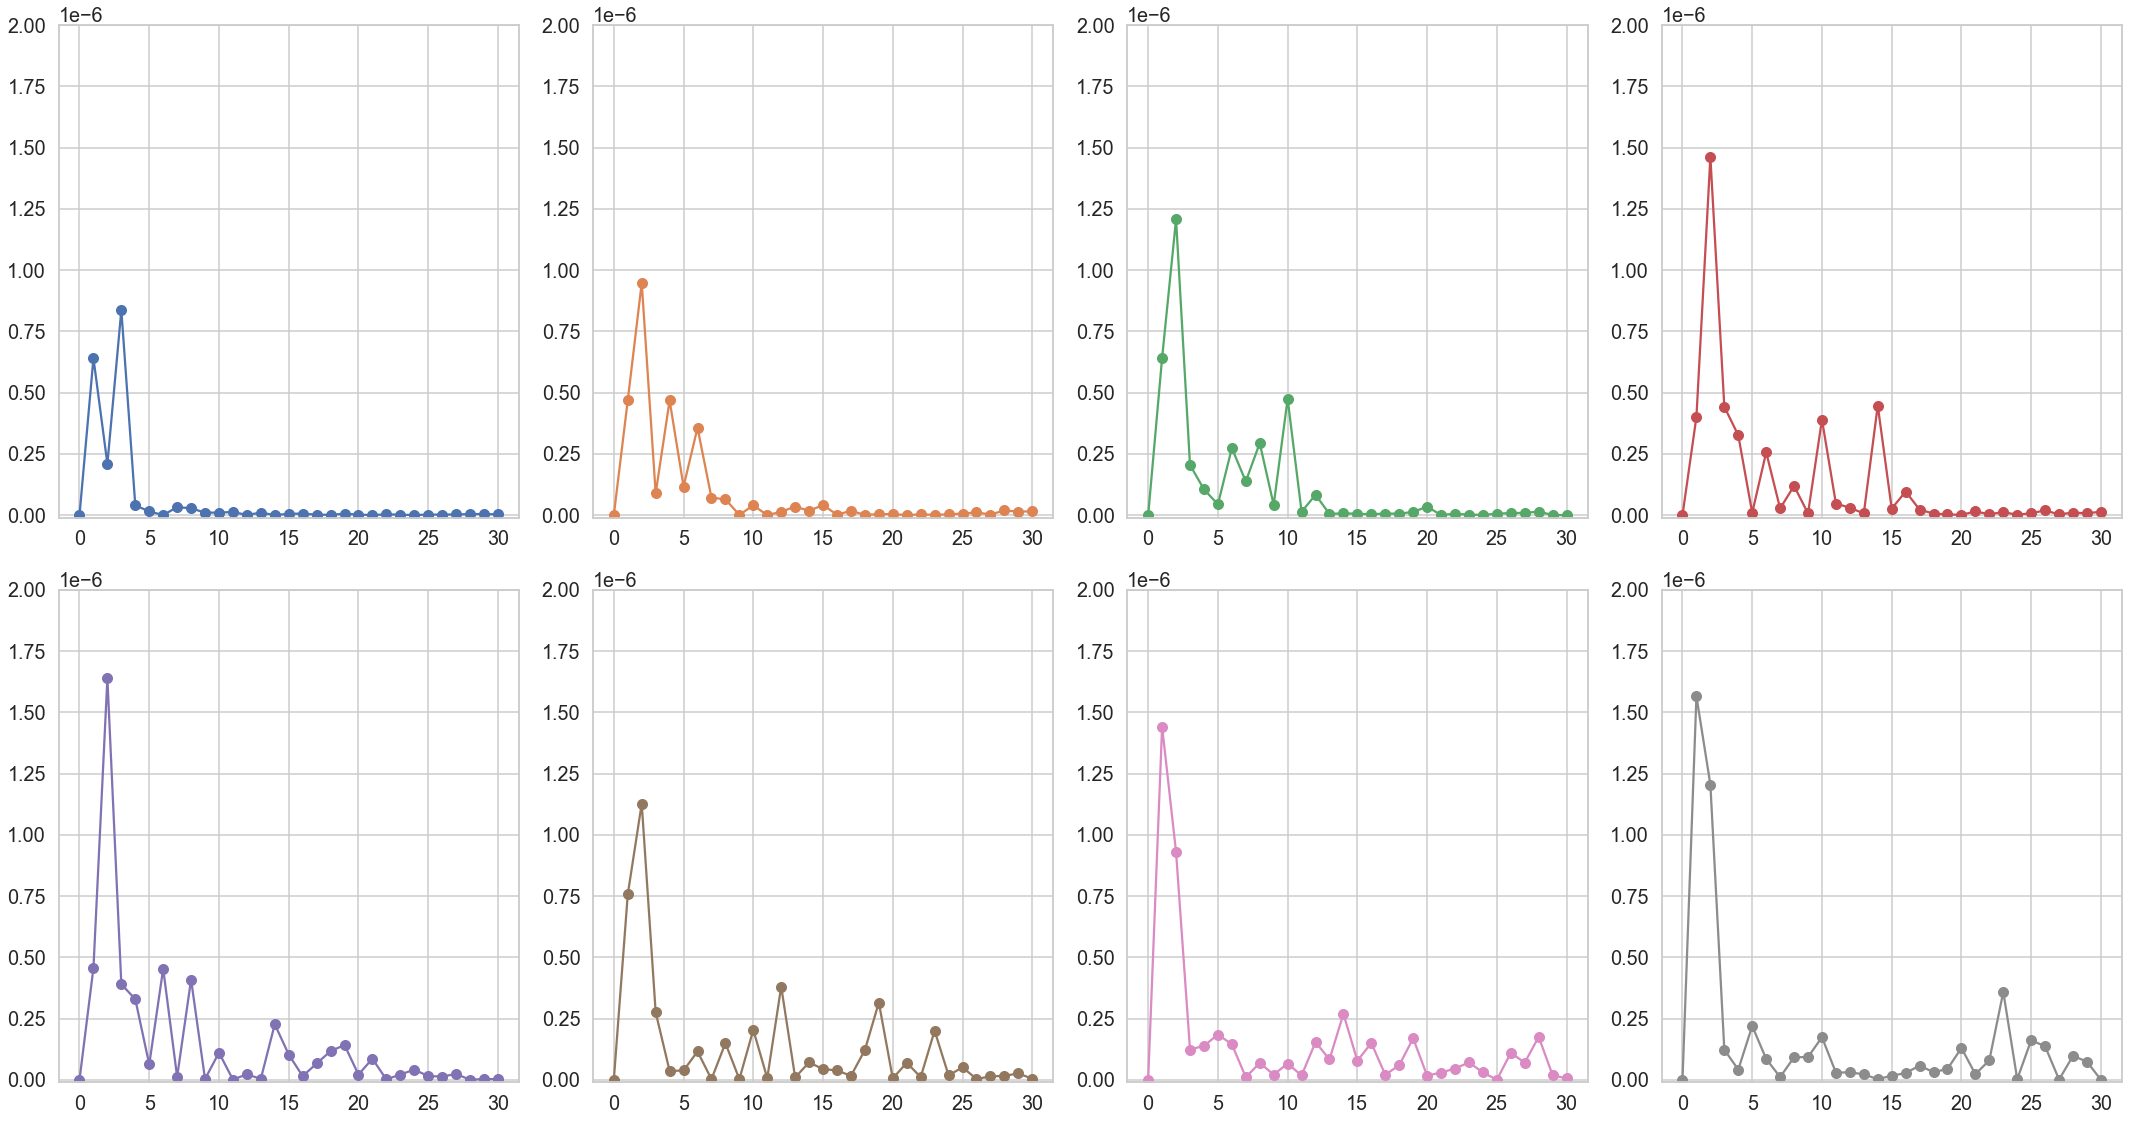

In [126]:
#fig,axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(40,16))
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig,axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(30,16))
axs = axs.flatten()
#fig = plt.figure(figsize=(13,8))
#ax = fig.add_subplot(1,1,1)
clist = sns.color_palette('deep')

for m,test_z in enumerate(['00']):
    
    for n,r in enumerate(np.arange(0,40,5)):
        if r < 10:
            key = f'r0{r}z{test_z}'
        else:
            key = f'r{r}z{test_z}'

        x = np.array([r*0.001])
        y = np.array([0.0])
        coord = np.array([x,y]).T
        model_mags = np.roll(MagModel(60, coord,)[:, 0], -14)

        temp_data = jugaad_data[key][:]
        mags = abs(temp_data[:,76,1,0])
        #mags = mags / np.mean(mags) # rescale
        #mags = mags - np.mean(mags) # remove DC

        axs[n].plot(
            abs(np.fft.rfft(mags-mags.mean(), norm='forward'))**2,
            color=clist[n],
            ls='-',
            marker='.',
            markersize=20
        )
        axs[n].set_ylim(-1e-8, 2e-6)
plt.tight_layout(pad=1.05)

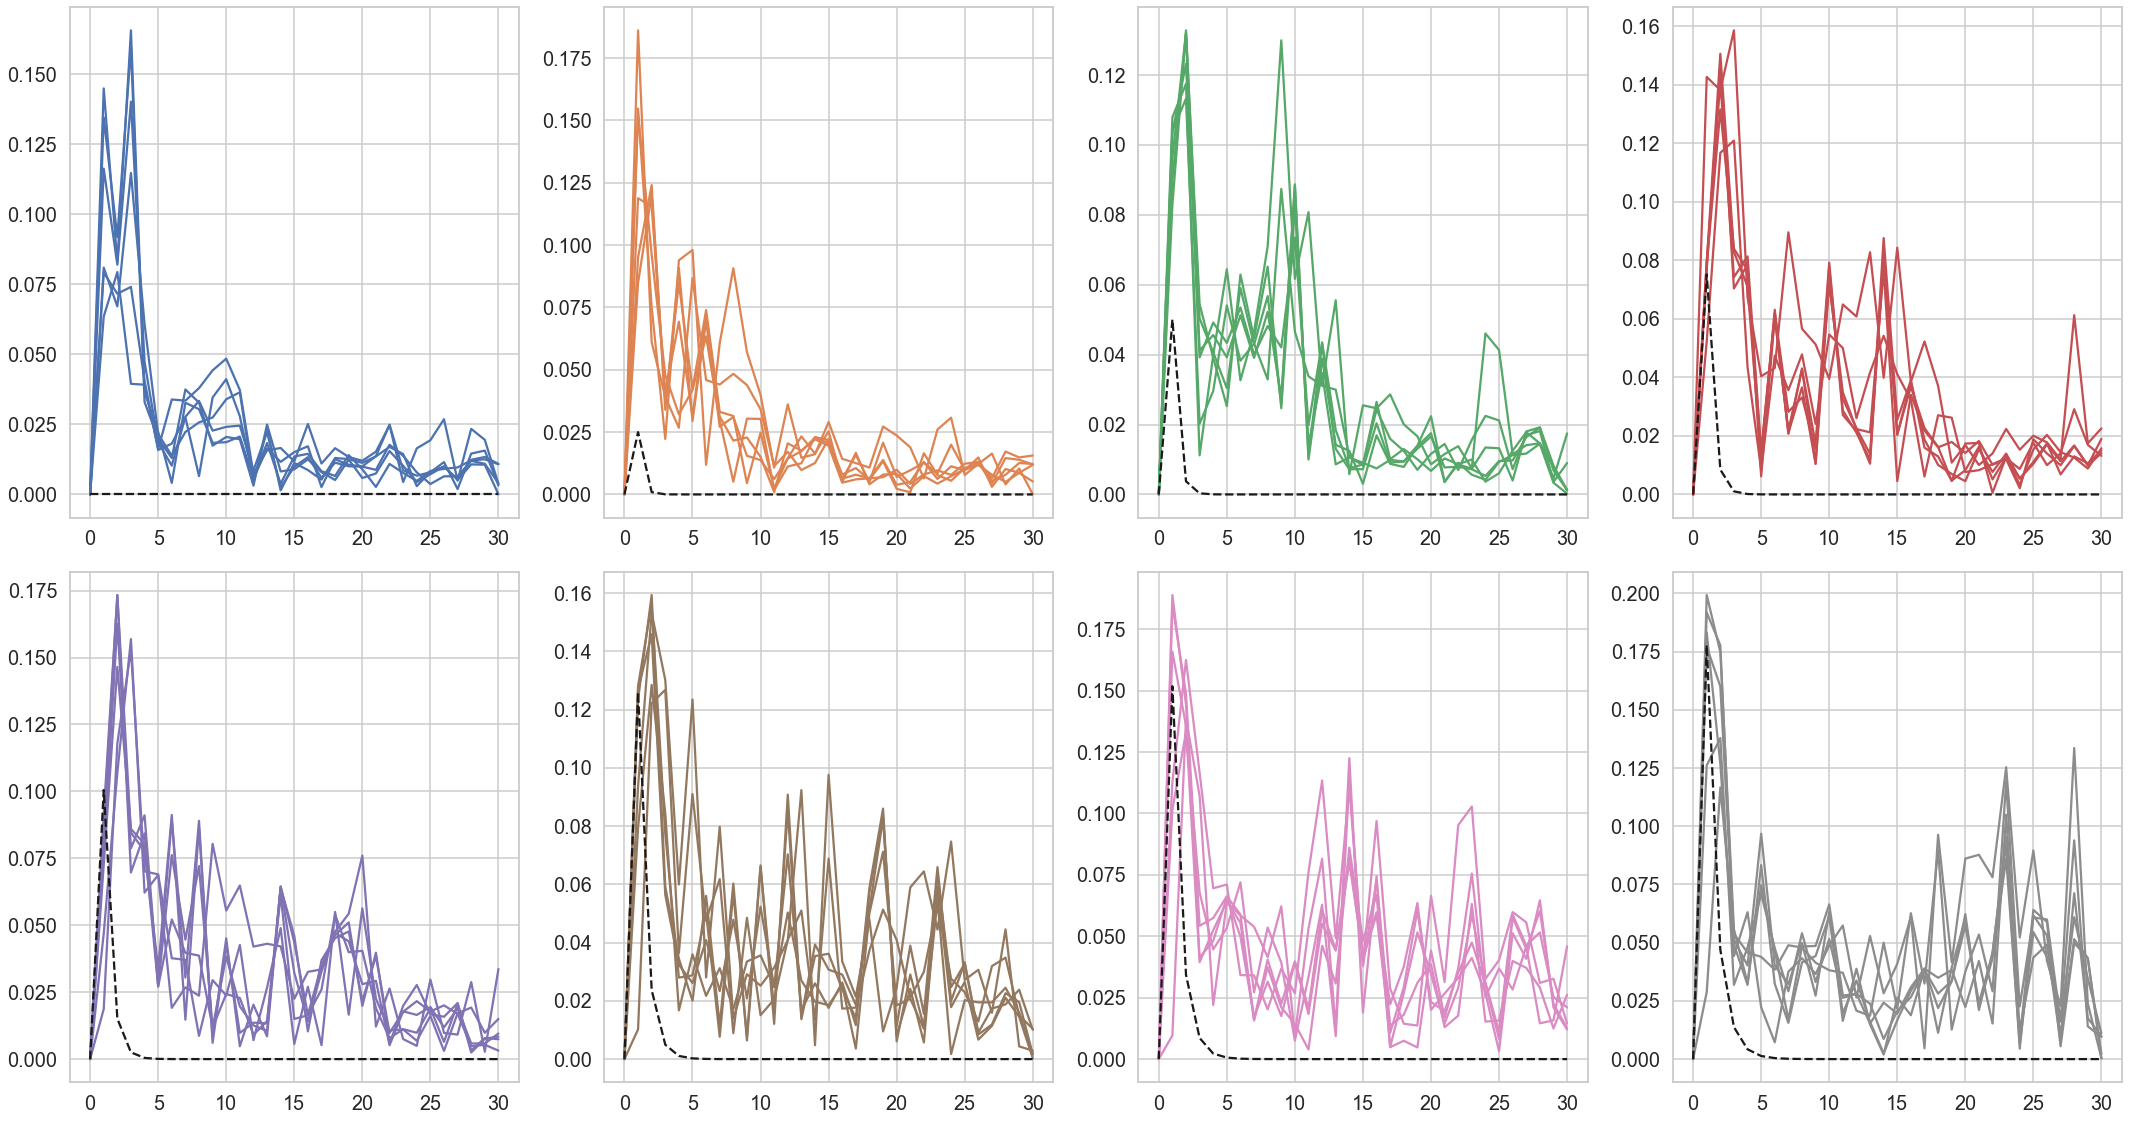

In [75]:
#fig,axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(40,16))
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig,axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(30,16))
axs = axs.flatten()
clist = sns.color_palette('deep')

for m,test_z in enumerate(['00','05','10','15','20','25']):
    
    for n,r in enumerate(np.arange(0,40,5)):
        if r < 10:
            key = f'r0{r}z{test_z}'
        else:
            key = f'r{r}z{test_z}'

        x = np.array([r*0.001])
        y = np.array([0.0])
        coord = np.array([x,y]).T
        model_mags = np.roll(MagModel(60, coord,)[:, 0], -14)

        temp_data = jugaad_data[key][:]
        mags = abs(temp_data[:,76,1,0])
        mags = mags / np.mean(mags) # rescale
        mags = mags - np.mean(mags) # remove DC
        model_mags = model_mags / np.mean(model_mags)
        model_mags = model_mags - np.mean(model_mags)
        

        axs[n].plot(abs(np.fft.rfft(mags,norm='forward')), color=clist[n])
        if m == 5:
            axs[n].plot(abs(np.fft.rfft(model_mags,norm='forward')), color='k', ls='--')
        #axs[n].set_ylim(0, 0.2)
        #axs.plot(mags, color=clist[n])
        #axs[n].plot(model_mags*np.mean(mags),color='k',ls=':')
plt.tight_layout(pad=1.05)

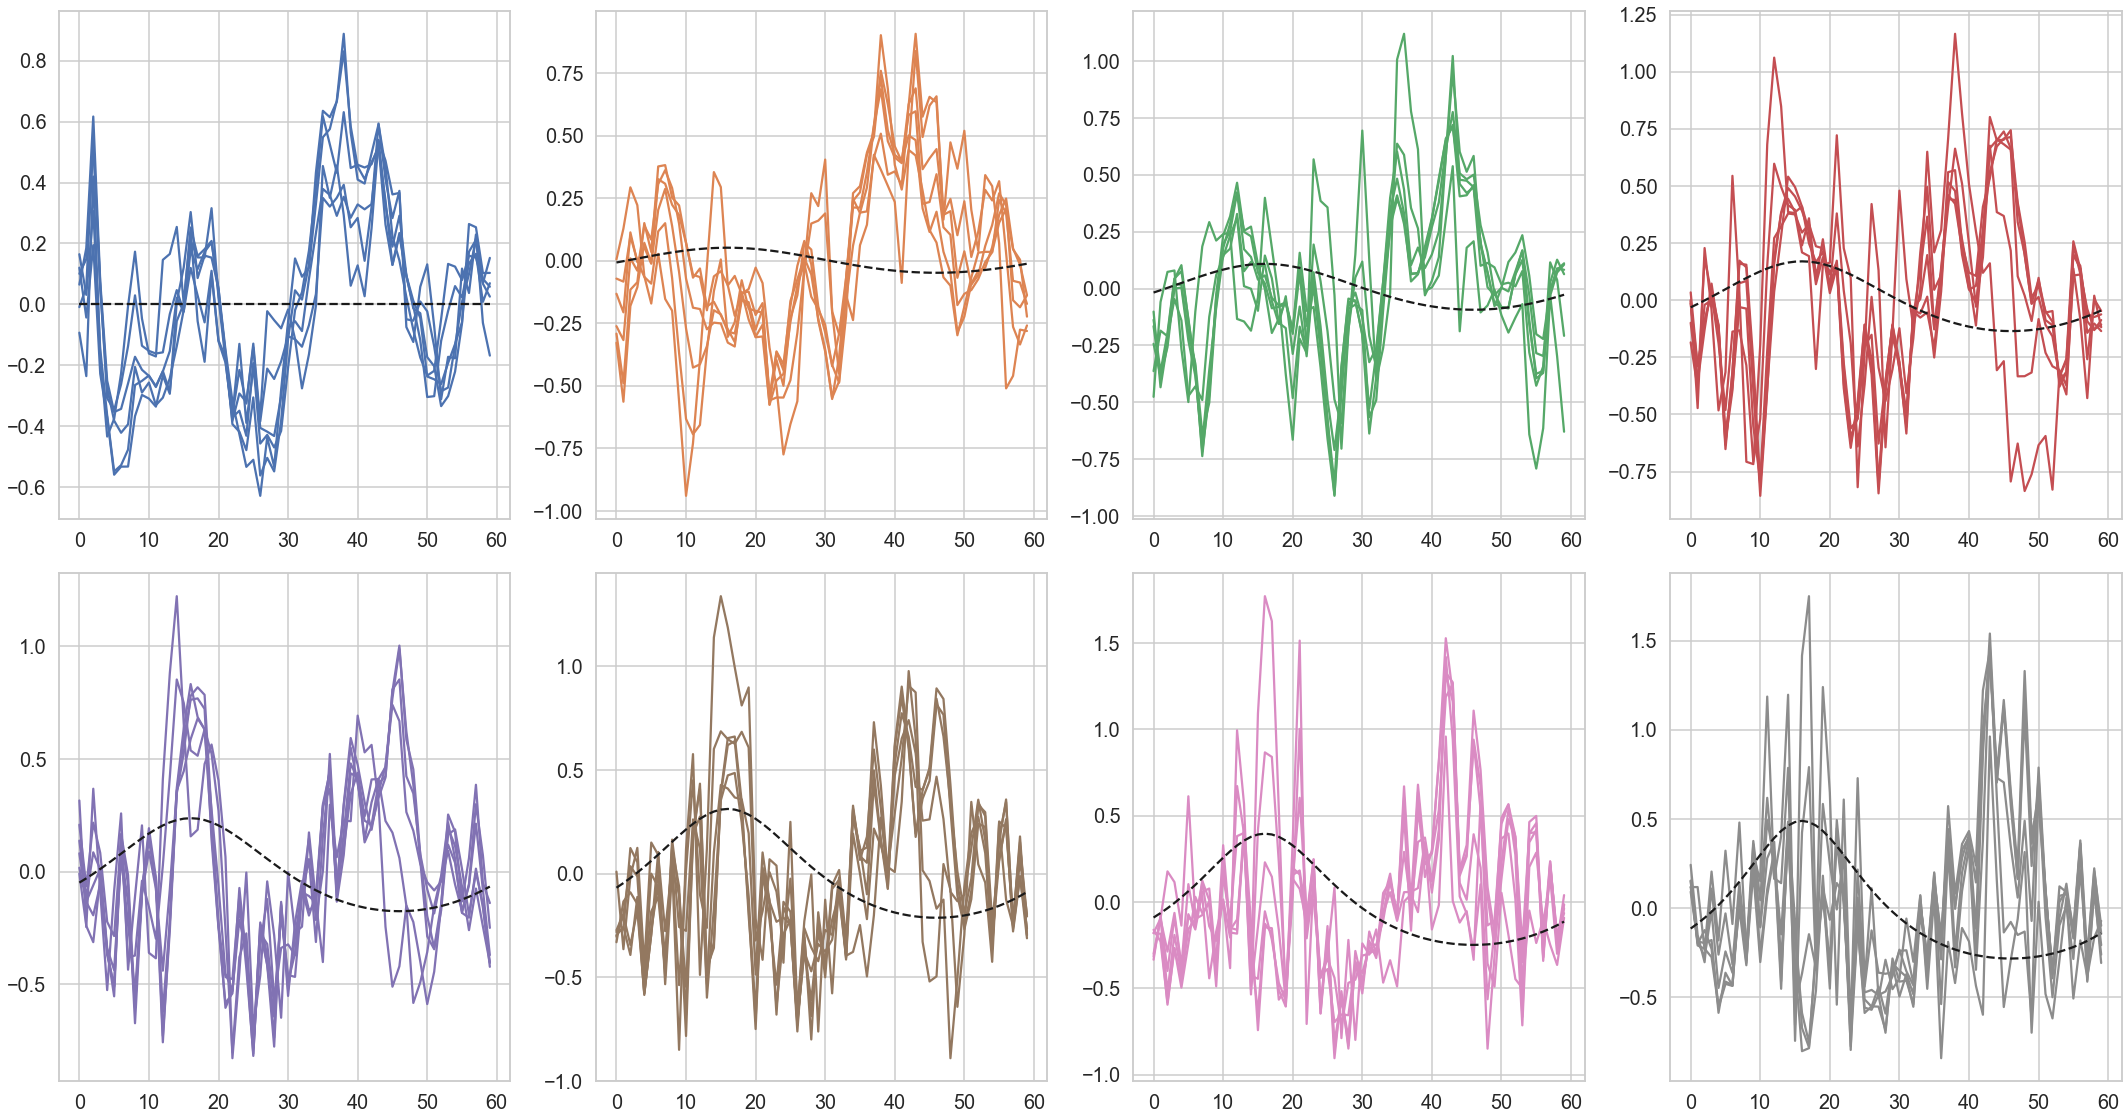

In [95]:
#fig,axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(40,16))
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig,axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(30,16))
axs = axs.flatten()
clist = sns.color_palette('deep')

for m,test_z in enumerate(['00','05','10','15','20','25']):
    
    for n,r in enumerate(np.arange(0,40,5)):
        if r < 10:
            key = f'r0{r}z{test_z}'
        else:
            key = f'r{r}z{test_z}'

        x = np.array([r*0.001])
        y = np.array([0.0])
        coord = np.array([x,y]).T
        model_mags = np.roll(MagModel(60, coord,)[:, 0], 16)

        temp_data = jugaad_data[key][:]
        mags = abs(temp_data[:,76,1,0])
        mags = mags / np.mean(mags) # rescale
        mags = mags - np.mean(mags) # remove DC
        model_mags = model_mags / np.mean(model_mags)
        model_mags = model_mags - np.mean(model_mags)
        

        axs[n].plot(mags, color=clist[n])
        if m == 5:
            axs[n].plot(model_mags, color='k',ls='--')
        #if m == 5:
        #    axs[n].plot(abs(np.fft.rfft(model_mags,norm='forward')), color='k', ls='--')
        #axs[n].set_ylim(0, 0.2)
        #axs.plot(mags, color=clist[n])
        #axs[n].plot(model_mags*np.mean(mags),color='k',ls=':')
plt.tight_layout(pad=1.05)

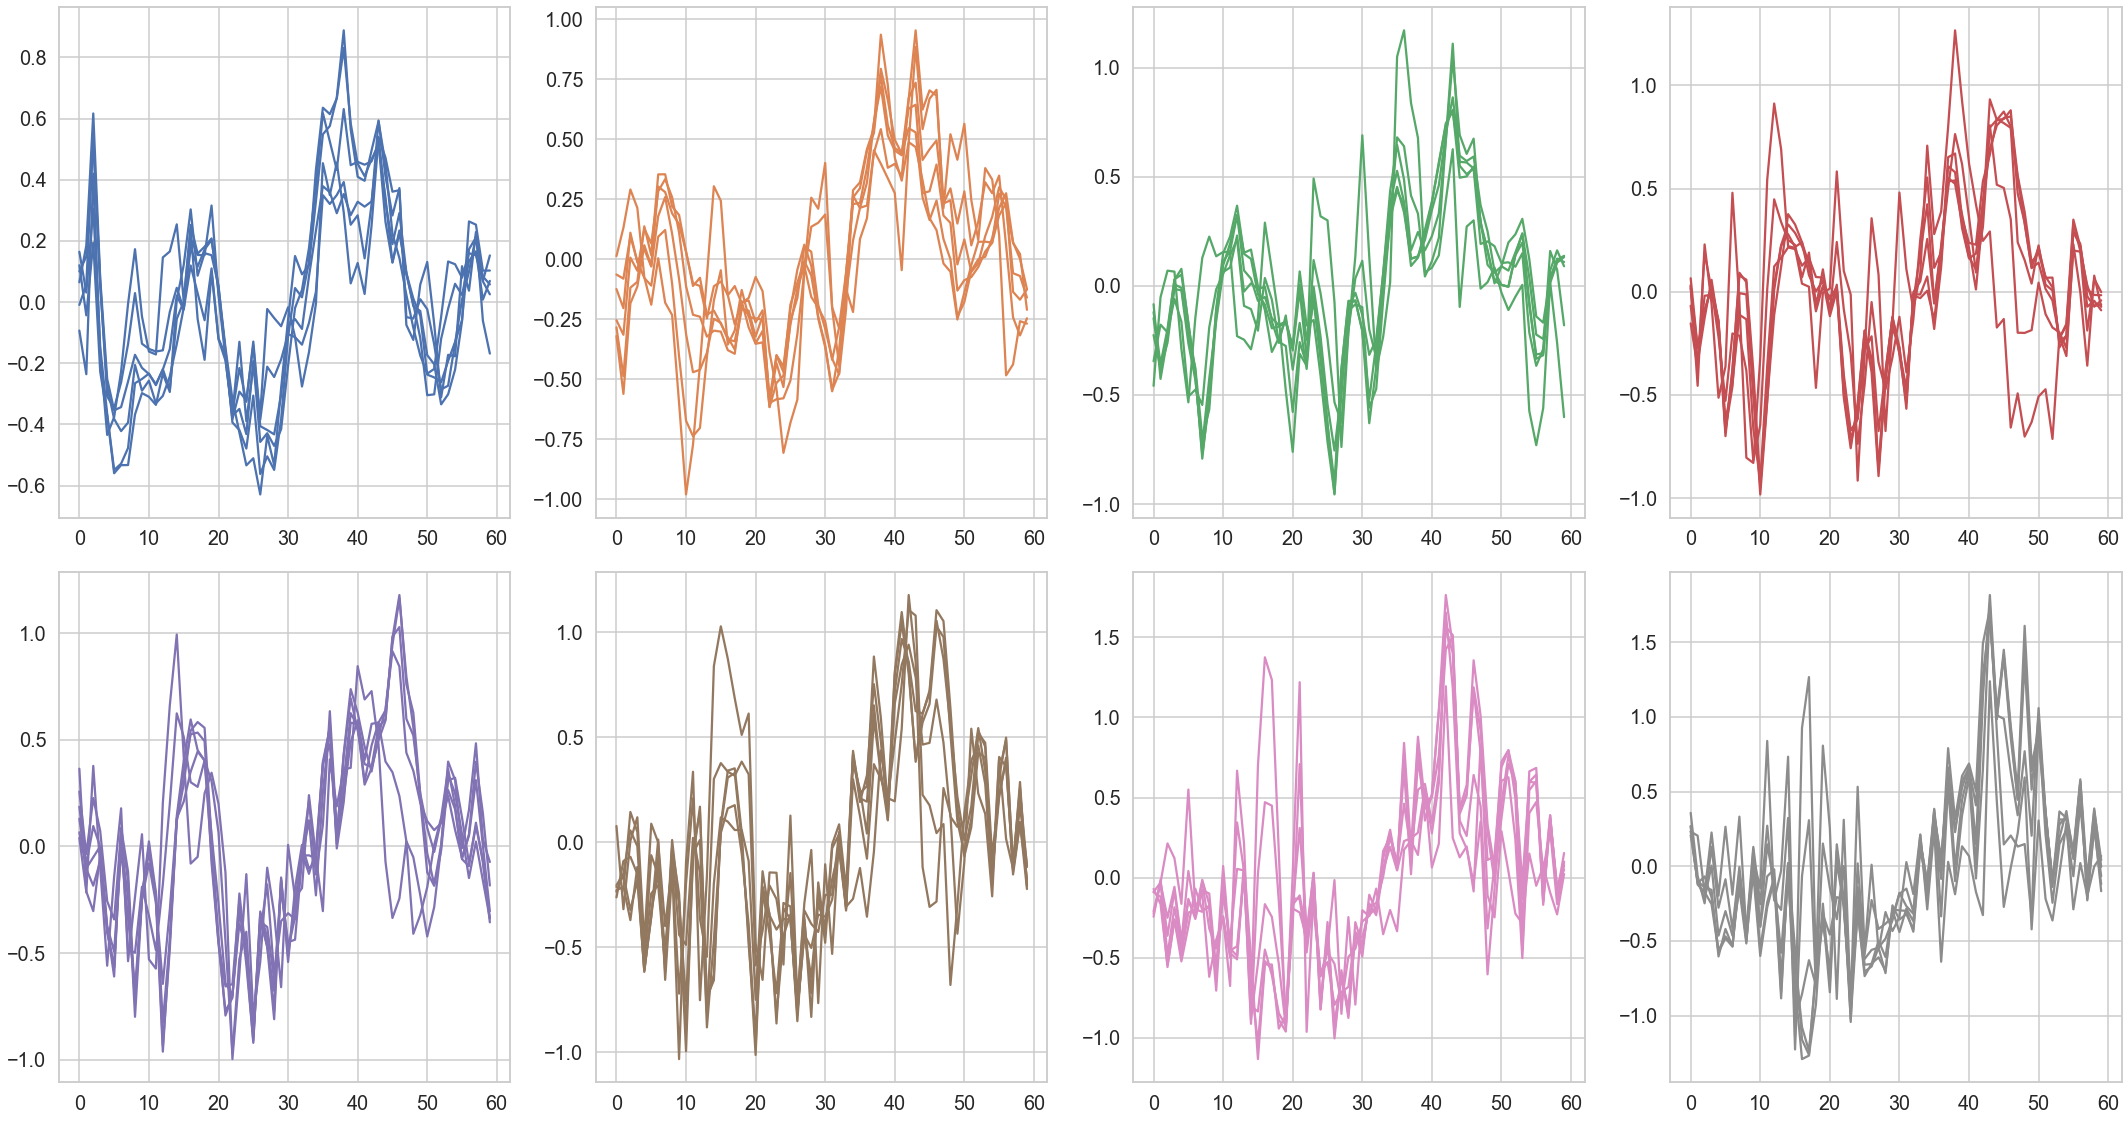

In [106]:
#fig,axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(40,16))
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig,axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(30,16))
axs = axs.flatten()
clist = sns.color_palette('deep', n_colors=12)

for m,test_z in enumerate(['00','05','10','15','20','25']):
    
    for n,r in enumerate([0,5,10,15,20,25,30,35]):
        if r < 10:
            key = f'r0{r}z{test_z}'
        else:
            key = f'r{r}z{test_z}'

        x = np.array([r*0.001])
        y = np.array([0.0])
        coord = np.array([x,y]).T
        model_mags = np.roll(MagModel(60, coord,)[:, 0], 16)
        model_mags = model_mags / np.mean(model_mags)
        model_mags = model_mags - np.mean(model_mags)

        temp_data = jugaad_data[key][:]
        mags = abs(temp_data[:,76,1,0])
        mags = mags / np.mean(mags) # rescale
        mags = mags - np.mean(mags) # remove DC
        #mags = np.fft.rfft(mags)
        #mags[5:] = 0
        #mags = np.fft.irfft(mags)
        

        axs[n].plot(mags-model_mags, color=clist[n])
        #if m == 5:
        #    axs[n].plot(model_mags, color='k',ls='--')
        #if m == 5:
        #    axs[n].plot(abs(np.fft.rfft(model_mags,norm='forward')), color='k', ls='--')
        #axs[n].set_ylim(0, 0.2)
        #axs.plot(mags, color=clist[n])
        #axs[n].plot(model_mags*np.mean(mags),color='k',ls=':')
plt.tight_layout(pad=1.05)

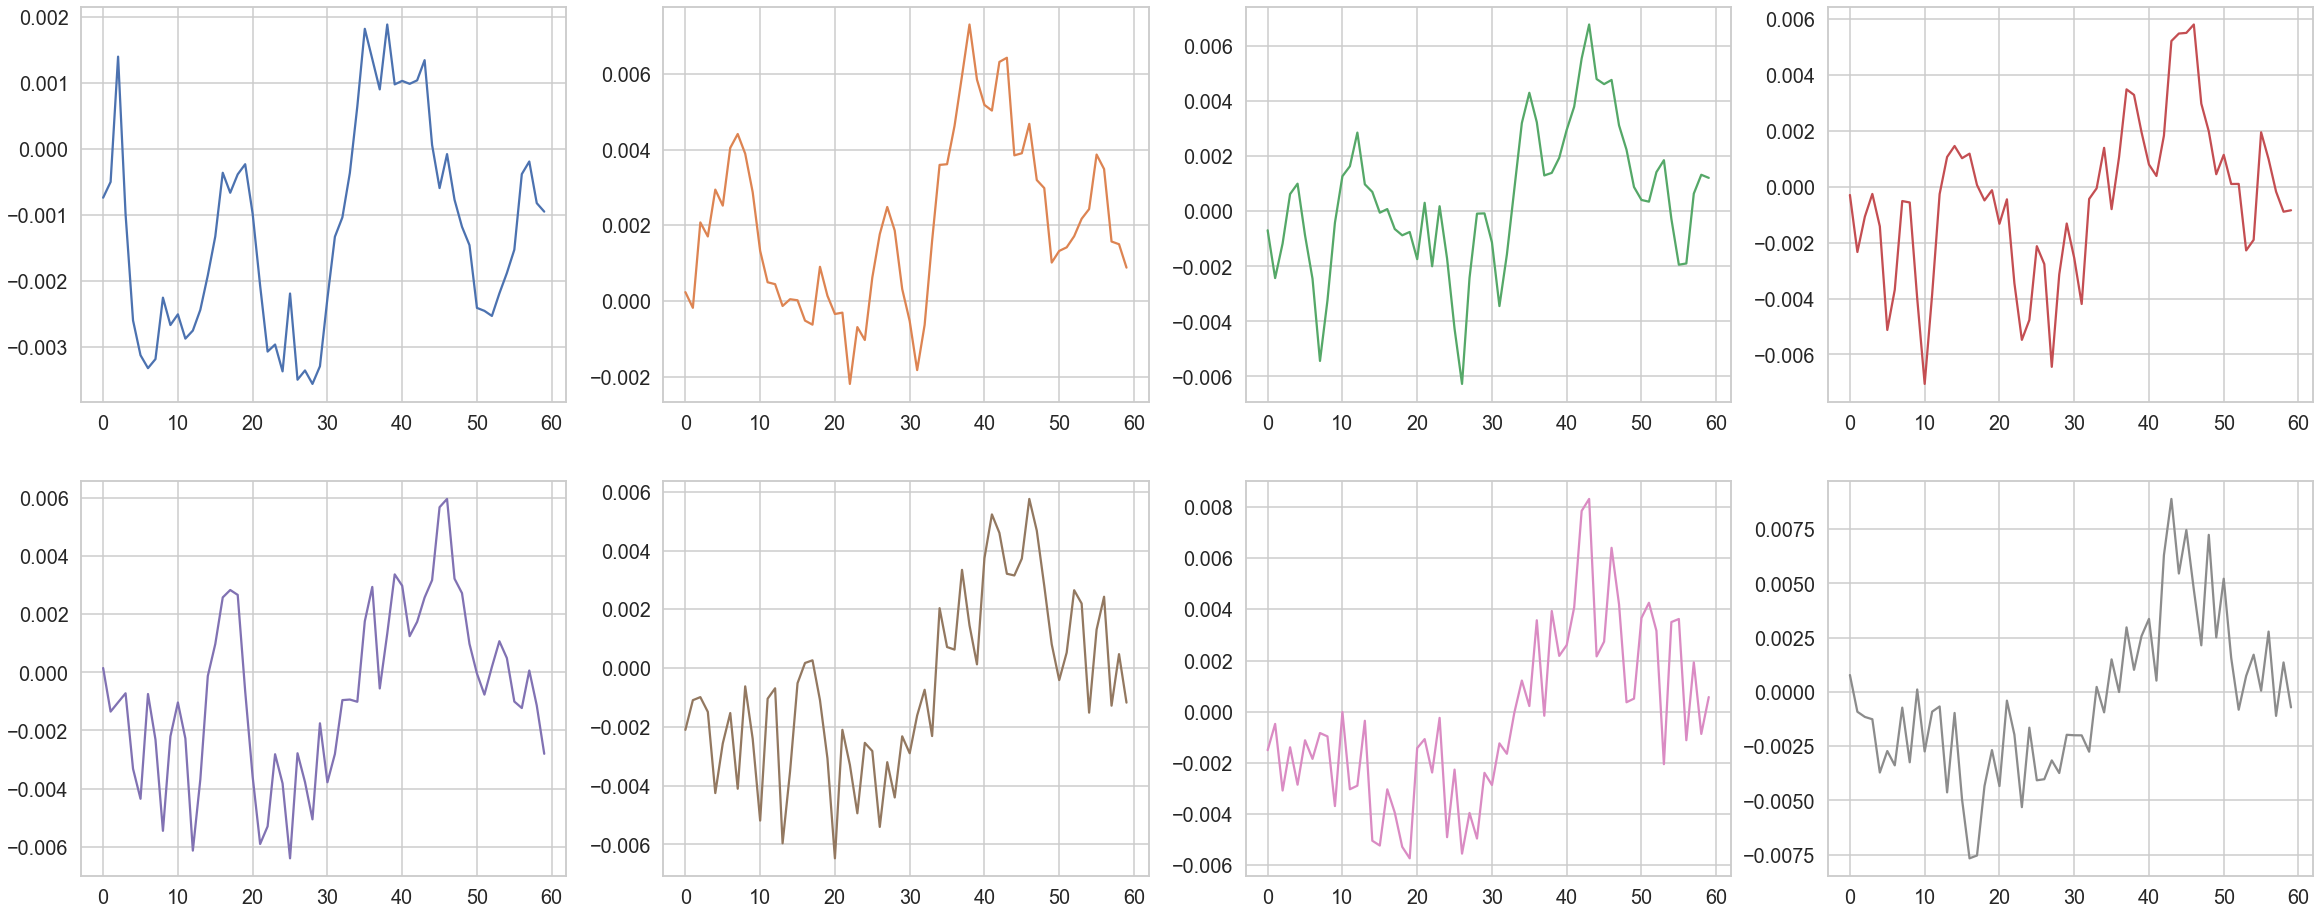

In [48]:
fig,axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(40,16))
axs = axs.flatten()
clist = sns.color_palette('deep')
test_z = '10'
for n,r in enumerate(np.arange(0,40,5)):
    if r < 10:
        key = f'r0{r}z{test_z}'
    else:
        key = f'r{r}z{test_z}'
        
    x = np.array([r*0.001])
    y = np.array([0.0])
    coord = np.array([x,y]).T
    model_mags = np.roll(MagModel(60, coord,)[:, 0], -14)*np.mean(mags)
        
    temp_data = jugaad_data[key][:]
    mags = abs(temp_data[:,76,1,0])
    
    axs[n].plot(mags-model_mags, color=clist[n])
    